# Maratona de Filmes | Relatório Parcial

#### Ellen Shen e Luiza Valezim

## Objetivo do Projeto

**Cenário:** Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

**Entrada:** Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

**Saída:** Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

A entrada tem o seguinte formato:
```
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

- `n = 10`: 10 filmes disponíveis.
- `m = 1, 3, 1, 2`: 1 filme para a categoria 1, 3 filmes para a categoria 2, 1 filme para a categoria 3 e 2 filmes para a categoria 4.
- `(H[1], F[1], C[1]) = (11, 13, 3); (H[2], F[2], C[2]) = (14, 15, 3)`: o filme 1 começa às 11h, termina às 13h e pertence a categoria 3 e assim por diante.

Outuput esperado:
```
Foram vistos 2 filmes.
12 13 4
14 15 1
```

## Heurística gulosa

A heurística gulosa, também conhecida como busca gulosa, é um método de resolução de problemas que segue a abordagem "tomar a melhor decisão imediata" em cada etapa do processo de resolução. Em outras palavras, a heurística gulosa escolhe a opção que parece ser a melhor no momento atual, sem considerar as possíveis consequências futuras dessa escolha.

Essa abordagem é comumente usada em problemas de otimização, em que o objetivo é encontrar a solução que maximize ou minimize uma determinada função. Em cada etapa, a heurística gulosa escolhe a opção que maximiza ou minimiza a função objetivo, com base nas informações disponíveis naquele momento.

Apesar de ser uma estratégia simples e rápida, a heurística gulosa pode não levar à melhor solução global do problema, já que as escolhas locais ótimas podem não levar a uma solução global ótima. Por isso, a heurística gulosa é muitas vezes combinada com outras técnicas, como busca em largura ou busca em profundidade, para melhorar a qualidade da solução encontrada.

## Aleatorização

A aleatorização pode ser usada em algoritmos de busca local para explorar diferentes regiões do espaço de soluções e escapar de mínimos locais ou máximos locais. Na busca local, o algoritmo começa com uma solução inicial e, em seguida, tenta melhorar iterativamente a solução encontrando soluções vizinhas melhores.

## Implementação

### Preparação dos dados:

Nosso passo limpar e organizar os dados de entrada e prepará-los para serem utilizados. Dessa maneira, foi criada uma struct `Movie` para organizar os dados no formato `H[i], F[i], C[i]`. A construção da struct abaixo:
```
struct Movie {
  int start;
  int end;
  int genre;
};
```

Foram criadas as variáveis para quantidade de filmes e categorias e um vetor com índice contendo a quantidade de filmes que poderiam ser assistidos em cada categoria. A função cin da biblioteca iostream, recebe o dado de entrada do arquivo na ordem em que ele é lido. Então temos em ordem primeiro a quantidade de filmes e depois a quantidade de categorias. O vetor, foi inicializado com zeros, mas logo podemos substituir seus dados e criar o vetor de filmes.


```
int n_movies, n_genres;
cin >> n_movies>> n_genres;
vector<int> movie_by_genre(n_genres, 0);
Movie empty_movie = {0, 0, 0};
vector<Movie> movies(n_movies, empty_movie);
    
for (int i = 0; i < n_genres; i++){
        cin >> movie_by_genre[i];
    }
```



Primeiramente, é preciso ordenar os filmes de forma crescente em relação ao horário de término, e não ao horário de início. Para realizar a ordenação, utilizamos a função sort() da biblioteca algorithm. Assim, depois podemos ordenar os filmes que acabam no mesmo horário, em crescente em relação ao horário de início.

```
sort(movies.begin(), movies.end(), [] (Movie &a, Movie &b){
    return a.end < b.end;
});

for (int i = 0; i < int(movies.size()); i++){
    if (movies[i].end == movies[i+1].end){
        if (movies[i].start > movies[i+1].start) {
            Movie aux = movies[i];
            movies[i] = movies[i+1];
            movies[i+1] = aux;
        }
    }
}
```

Criamos um dicionário para organizar esses dados:
```
for (int i = 0; i < n_movies; i++){
    myDict[movies[i].fim].push_back(movies[i]);
}
```

Agora podemos implementar os 75% de heurística gulosa e 25% de aleatorização.
- A heurística gulosa seleciona o primeiro filme que encontrar (terminando em um mesmo horário).
- A aleatorização vai sortear um filme (terminando em um mesmo horário).


```
for (int i = 1; i <= 24; i++){
    int sorteio = distribution(generator)*abs(rand()%2);
    if (free_time == hour_mask){
        break;
    }
    if (sorteio == 1){
        greedy(myDict[i], movie_by_genre, free_time, vector_seen_movies, seen_movies);
    } else
    {   
        randomness(myDict[i], movie_by_genre, free_time, vector_seen_movies, seen_movies);
    }
}
```


### Heurística Gulosa

A função da heuristica gulosa recebe as seguintes variáveis:

- `movies[i]`: todos os filmes que terminam em um horário;
- `movie_by_genre`: quantidade de filmes que podem ser assistidos em cada categoria.
- `free_time`: um bitset de tamanho 24.
- `vector_seen_movies`: o vetor de filmes vistos.
- `seen_movies`: número de filmes que poderão ser vistos em um dia.

```
void greedy(vector<Movie> &movies, vector<int> &movie_by_genre, bitset<24> &free_time, vector<Movie> &vector_seen_movies, int &seen_movies) {

    for (int i = 0; i <int(movies.size()); i++){
        bitset<24> hour;
        fill_bitset(hour, movies[i].start-1, movies[i].end-1);
        if ((!(free_time & hour).any()) && (movie_by_genre[movies[i].genre-1] > 0)) {  
            vector_seen_movies.push_back(movies[i]);
            movie_by_genre[movies[i].genre-1]--;
            fill_bitset(free_time, movies[i].start-1, movies[i].end-1);
            return;
        }
    }
}

```

A função utiliza um loop `for` para percorrer todos os filmes do vetor `movies`. Em cada iteração, a função cria um bitset `hour` que representa o horário em que o filme pode ser assistido, preenchendo as horas com valor `1` dentro do intervalo de tempo que o filme está disponível para ser assistido.

Em seguida, é realizada uma verificação para verificar se o horário em que o filme pode ser assistido `hour` está livre no bitset que representa os horários livres para assistir filmes `free_time`. Para isso, é feita uma operação de `AND` entre os dois bitsets, e o método `any()` é aplicado para verificar se há algum valor `1` na interseção dos bitsets. Se o resultado for falso, significa que o horário está disponível para assistir o filme.

Além disso, a função verifica se ainda há filmes disponíveis para serem assistidos do mesmo gênero do filme selecionado. Para isso, é utilizado o vetor `movie_by_genre`, que contém a quantidade de filmes disponíveis para cada gênero. Se houver disponibilidade de filmes do mesmo gênero, o filme é selecionado e adicionado ao vetor `vector_seen_movies`, que armazena os filmes selecionados. O valor correspondente ao gênero do filme selecionado no vetor `movie_by_genre` é decrementado, indicando que um filme desse gênero foi selecionado.

Por fim, o bitset `free_time` é atualizado, marcando como `1` as horas que estão ocupadas com a seleção do filme. A função retorna após selecionar um único filme, de acordo com a lógica do algoritmo guloso.

### Aleatorização

O código da aleatorizacao é responsável por escolher um filme aleatoriamente dentre aqueles que estão disponíveis para serem assistidos, desde que o horário de exibição do filme não conflite com o horário dos filmes já vistos.

Primeiramente, a função cria um vetor vazio chamado `free_on_pause`, que será preenchido com os filmes que não conflitam com o horário já ocupado pelos filmes já vistos e que ainda possuem disponibilidade em seus respectivos gêneros. A partir da linha 4, a função percorre todos os filmes disponíveis na lista de filmes passada como parâmetro, criando um bitset que representa a hora em que o filme começa e termina e checando se esse horário entra em conflito com o horário já ocupado pelos filmes já vistos. Caso o horário do filme não entre em conflito e ainda exista disponibilidade de filmes no seu gênero, o filme é adicionado ao vetor `free_on_pause`.

Em seguida, a função verifica se o vetor `free_on_pause` contém algum filme disponível. Caso não contenha, a função retorna sem fazer nada. Caso contrário, a função seleciona um filme aleatório dentre aqueles que estão no vetor `free_on_pause`, adiciona esse filme ao vetor de filmes já vistos, decrementa a quantidade de filmes disponíveis no seu respectivo gênero e atualiza o bitset `free_time` para marcar o horário em que o filme será exibido.

É importante notar que, caso o vetor `free_on_pause` contenha apenas um filme, ele será o escolhido aleatoriamente. Caso contrário, a função usa a função `rand()` para gerar um número inteiro aleatório que será usado como índice para selecionar um filme aleatório do vetor `free_on_pause`. O valor retornado pela função `rand()` depende do valor da semente passada como argumento da função `srand()`, que nesse caso é o valor `time(NULL)`, que representa o número de segundos passados desde 1 de janeiro de 1970. Isso garante que a sequência de números aleatórios gerados por `rand()` seja diferente a cada execução da função randomness.

```

void randomness(vector<Movie> &movies, vector<int> &movie_by_genre, bitset<24> &free_time, vector<Movie> &vector_seen_movies, int &seen_movies) {
    vector<Movie> free_on_pause;
    if (int(movies.size()) > 1) {
        for (int i = 1; i < int(movies.size()); i++){
            bitset<24> hour;
            fill_bitset(hour, movies[i].start-1, movies[i].end-1);
            if ((!(free_time & hour).any()) && (movie_by_genre[movies[i].genre-1] > 0)) {    
                free_on_pause.push_back(movies[i]);
            }  
        }

        int random_int = 0;

        if (int(free_on_pause.size()) == 0){
            return;
        }
        if (free_on_pause.size() == 1){
            random_int = 0;
        } else{
            int size_myDictItem = int(free_on_pause.size()-1);
            srand(time(NULL));
            random_int = rand() % size_myDictItem+1;
        }

        seen_movies++;
        vector_seen_movies.push_back(free_on_pause[random_int]);
        movie_by_genre[free_on_pause[random_int].genre-1]--;
        fill_bitset(free_time, free_on_pause[random_int].start-1, free_on_pause[random_int].end-1);
    } 
}

```



### Output

No output podemos utilizar o `cout` com `seen_movies` e nossas entradas:

```
cout << seen_movies << " movies" << endl;

    for (int i = 0; i < int(vector_seen_movies.size()); i++){
        cout << vector_seen_movies[i].start << " " << vector_seen_movies[i].end << " " << vector_seen_movies[i].genre << endl;
    }

```

Exemplo de output:

```
2 movies
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

## Profiling

Para fazer o profiling, seguimos os seguintes passos:

`g++ -g greedy.cpp -Wall -O3 -o ./greedy_random`

`valgrind --tool=callgrind ./greedy_random --benchmark < input_x.txt`

`callgrind_annotate --threshold=0.01 callgrind.out.X greedy_random.cpp > greedy_profiling.txt`


### Conclusão Profiling

Foi possível observar que se a preocupação for minimizar o número de chamadas no código, o ideal seria seguir apenas com a heurística gulosa. Pois com a aleatorização, varremos todos os horários válidos do conjunto de filmes que terminavam no mesmo horário, e depois sorteavamos um desses para fazer parte da solução. Assim, temos mais ações a se fazer com aleatoriedade.

# Benchmark

Ao realizar o benchmark, podemos analisar a performance de cada um dos métodos que utilizamos para resolver o problema proposto para o projeto. Assim, nós conseguiremos obter os valores e a média para cada quantidade de filmes que foi rodado. É importante mencionar que iremos o benchmark com arquivos de 100 mil a 10 milhões de filmes, com o intuito de observarmos se as diferenças são significativas entre eles.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

### Greedy Heuristic Benchmark

In [ ]:
runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}
knapsack_movies = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(1, 10):
    for j in range(1, 5):
        start_time = time.time()
        !./code/greedy < inputs/in-{j}.txt > outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict[j].append(runtime)
        with open(f'output/out-{j}.txt', 'r') as f:
          line = f.readline().split()
          knapsack_movies[j].append(int(line[2]))
  
runtime_pd = dict_to_df(runtime_dict)
runtime_pd['mean'] = runtime_pd.mean(axis=1)
runtime_pd.to_csv('benchmark/runtime_greedy.csv', index=False)
knapsack_movies_pd = dict_to_df(knapsack_movies)
knapsack_movies_pd['mean'] = knapsack_movies_pd.mean(axis=1)
knapsack_movies_pd.to_csv('benchmark/greedy_knapsack_movies.csv', index=False)

Para o runtime_pd obtivemos:

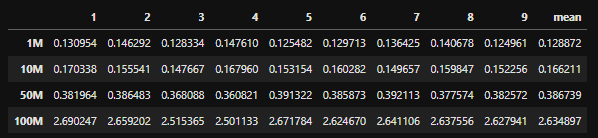

Para o knapsack_movies_pd obtivemos:

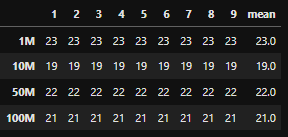

### Random Heuristic Benchmark

In [ ]:
runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}
knapsack_movies = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(1, 10):
    for j in range(1, 5):
        start_time = time.time()
        !./code/random < inputs/in-{j}.txt > outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict[j].append(runtime)
        with open(f'output/out-{j}.txt', 'r') as f:
          line = f.readline().split()
          knapsack_movies[j].append(int(line[2]))
  
runtime_pd = dict_to_df(runtime_dict)
runtime_pd['mean'] = runtime_pd.mean(axis=1)
runtime_pd.to_csv('benchmark/runtime_random.csv', index=False)
knapsack_movies_pd = dict_to_df(knapsack_movies)
knapsack_movies_pd['mean'] = knapsack_movies_pd.mean(axis=1)
knapsack_movies_pd.to_csv('benchmark/random_knapsack_movies.csv', index=False)

Para o runtime_pd obtivemos:

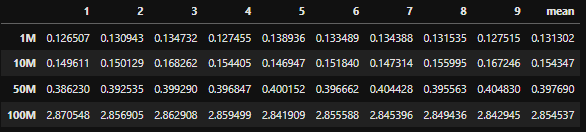

Para o knapsack_movies_pd obtivemos:

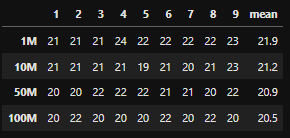

## Graphs

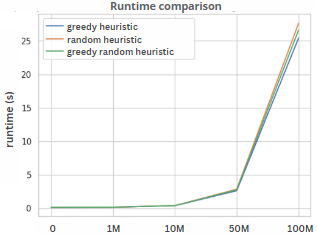

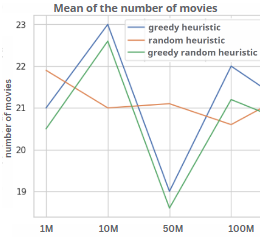

# Conclusão

Em resumo, foi observado que a heurística gulosa é mais eficaz do que a heurística gulosa com aleatoriedade para a tarefa de assistir ao máximo de filmes possível. Contudo, quando se trata de minimizar o tempo de execução e reduzir as horas ociosas, a heurística gulosa com aleatoriedade apresenta melhor desempenho. 

Uma possível explicação para esse resultado é que a heurística gulosa seleciona os filmes mais longos primeiro, o que pode limitar as opções para os filmes mais curtos posteriormente. Por outro lado, a heurística com aleatoriedade pode ser mais eficiente ao selecionar filmes curtos no início e deixar as opções para filmes longos mais tarde. No entanto, essa abordagem pode levar a uma seleção ineficiente das categorias. 

Em síntese, a heurística gulosa sem aleatoriedade é mais determinística e prioriza o número de filmes assistidos, enquanto a heurística gulosa com aleatoriedade é mais aleatória e enfatiza a eficiência do tempo de tela, mas pode sacrificar algumas categorias de filmes.

### Referências

https://insper.github.io/supercomp/

